### 首先引入上节构建的类

In [1]:
import sys
sys.path.append(r'./PycharmProjects/RL_kirsguo/5.On-Policy MC')
from blackjack import Player, Dealer, Arena
from general_basic import str_key, set_dict, get_dict
from general_basic import draw_value, draw_policy
from general_basic import epsilon_greedy_policy
import math


In [2]:
class MC_Player(Player):
    '''具备蒙特卡罗控制能力的玩家
    '''
    def __init__(self, name = "", A = None, display = False):
        super(MC_Player, self).__init__(name, A, display)
        self.Q = {}   # 某一状态行为对的价值，策略迭代时使用
        self.Nsa = {} # Nsa的计数：某一状态行为对出现的次数
        self.total_learning_times = 0
        self.policy = self.epsilon_greedy_policy # 
        self.learning_method = self.learn_Q # 有了自己的学习方法
    
    def learn_Q(self, episode, r): # 从状态序列来学习Q值
        '''从一个Episode学习
        '''
        #for episode, r in episodes:
        for s, a in episode:
            nsa = get_dict(self.Nsa, s, a)
            set_dict(self.Nsa, nsa+1, s, a)
            q = get_dict(self.Q, s,a)
            set_dict(self.Q, q+(r-q)/(nsa+1), s, a)
        self.total_learning_times += 1
    
    def reset_memory(self):
        '''忘记既往学习经历
        '''
        self.Q.clear()
        self.Nsa.clear()
        self.total_learning_times = 0

    
    def epsilon_greedy_policy(self, dealer, epsilon = None):
        '''这里的贪婪策略是带有epsilon参数的
        '''
        player_points, _ = self.get_points()
        if player_points >= 21:
            return self.A[1]
        if player_points < 12:
            return self.A[0]
        else:
            A, Q = self.A, self.Q
            s = self.get_state_name(dealer)
            if epsilon is None:
                #epsilon = 1.0/(self.total_learning_times+1)
                #epsilon = 1.0/(1 + math.sqrt(1 + player.total_learning_times))
                epsilon = 1.0/(1 + 4 * math.log10(1+player.total_learning_times))
            return epsilon_greedy_policy(A, s, Q, epsilon)


In [3]:
A = ["继续叫牌","停止叫牌"]
display = False
player = MC_Player(A=A, display=display)
dealer = Dealer(A=A, display=display)
# 创建一个场景
arena = Arena(A=A, display=display)

In [4]:
arena.play_games(dealer=dealer, player=player, num=200000, show_statistic=True)

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 148/200000 [00:00<02:18, 1438.96it/s]

  0%|          | 435/200000 [00:00<01:57, 1692.01it/s]

  0%|          | 796/200000 [00:00<01:39, 2007.96it/s]

  0%|          | 985/200000 [00:00<01:53, 1759.88it/s]

  1%|          | 1237/200000 [00:00<01:42, 1933.96it/s]

  1%|          | 1630/200000 [00:00<01:26, 2281.51it/s]

  1%|          | 2142/200000 [00:00<01:12, 2736.05it/s]

  1%|▏         | 2572/200000 [00:00<01:04, 3071.10it/s]

  2%|▏         | 3074/200000 [00:00<00:56, 3475.92it/s]

  2%|▏         | 3478/200000 [00:01<00:54, 3619.55it/s]

  2%|▏         | 3996/200000 [00:01<00:49, 3978.62it/s]

  2%|▏         | 4478/200000 [00:01<00:46, 4194.15it/s]

  2%|▏         | 4940/200000 [00:01<00:45, 4312.29it/s]

  3%|▎         | 5542/200000 [00:01<00:41, 4712.85it/s]

  3%|▎         | 6184/200000 [00:01<00:37, 5121.18it/s]

  3%|▎         | 6834/200000 [00:01<00:35, 5467.68it/s]

  4%|▎         | 7481/200000 [00:01<00:33, 5733.81it/s]

  4%|▍         | 8115/200000 [00:01<00:32, 5903.02it/s]

  4%|▍         | 8743/200000 [00:01<00:31, 6009.81it/s]

  5%|▍         | 9357/200000 [00:02<00:31, 6037.99it/s]

  5%|▍         | 9970/200000 [00:02<00:31, 6039.14it/s]

  5%|▌         | 10580/200000 [00:02<00:34, 5541.78it/s]

  6%|▌         | 11147/200000 [00:02<00:36, 5109.12it/s]

  6%|▌         | 11735/200000 [00:02<00:35, 5317.08it/s]

  6%|▌         | 12365/200000 [00:02<00:33, 5577.57it/s]

  7%|▋         | 13008/200000 [00:02<00:32, 5808.57it/s]

  7%|▋         | 13653/200000 [00:02<00:31, 5985.33it/s]

  7%|▋         | 14261/200000 [00:02<00:31, 5946.27it/s]

  7%|▋         | 14863/200000 [00:03<00:32, 5755.73it/s]

  8%|▊         | 15445/200000 [00:03<00:47, 3919.51it/s]

  8%|▊         | 15920/200000 [00:03<00:54, 3351.08it/s]

  8%|▊         | 16467/200000 [00:03<00:48, 3789.56it/s]

  9%|▊         | 17105/200000 [00:03<00:42, 4312.63it/s]

  9%|▉         | 17736/200000 [00:03<00:38, 4761.87it/s]

  9%|▉         | 18304/200000 [00:03<00:36, 5003.18it/s]

  9%|▉         | 18912/200000 [00:03<00:34, 5283.44it/s]

 10%|▉         | 19499/200000 [00:04<00:33, 5446.16it/s]

 10%|█         | 20143/200000 [00:04<00:31, 5709.10it/s]

 10%|█         | 20771/200000 [00:04<00:30, 5866.84it/s]

 11%|█         | 21376/200000 [00:04<00:30, 5883.46it/s]

 11%|█         | 21977/200000 [00:04<00:32, 5440.40it/s]

 11%|█▏        | 22537/200000 [00:04<00:33, 5375.21it/s]

 12%|█▏        | 23180/200000 [00:04<00:31, 5651.44it/s]

 12%|█▏        | 23831/200000 [00:04<00:29, 5883.25it/s]

 12%|█▏        | 24430/200000 [00:04<00:30, 5785.13it/s]

 13%|█▎        | 25020/200000 [00:05<00:30, 5815.89it/s]

 13%|█▎        | 25648/200000 [00:05<00:29, 5946.17it/s]

 13%|█▎        | 26270/200000 [00:05<00:28, 6025.06it/s]

 13%|█▎        | 26876/200000 [00:05<00:28, 6031.78it/s]

 14%|█▎        | 27482/200000 [00:05<00:28, 5972.17it/s]

 14%|█▍        | 28088/200000 [00:05<00:28, 5995.89it/s]

 14%|█▍        | 28694/200000 [00:05<00:28, 6014.05it/s]

 15%|█▍        | 29325/200000 [00:05<00:27, 6099.51it/s]

 15%|█▍        | 29936/200000 [00:05<00:30, 5622.10it/s]

 15%|█▌        | 30550/200000 [00:05<00:29, 5767.48it/s]

 16%|█▌        | 31151/200000 [00:06<00:28, 5836.09it/s]

 16%|█▌        | 31794/200000 [00:06<00:28, 6001.47it/s]

 16%|█▌        | 32433/200000 [00:06<00:27, 6111.53it/s]

 17%|█▋        | 33074/200000 [00:06<00:26, 6197.46it/s]

 17%|█▋        | 33698/200000 [00:06<00:26, 6208.51it/s]

 17%|█▋        | 34331/200000 [00:06<00:26, 6243.60it/s]

 17%|█▋        | 34957/200000 [00:06<00:26, 6197.40it/s]

 18%|█▊        | 35586/200000 [00:06<00:26, 6223.78it/s]

 18%|█▊        | 36223/200000 [00:06<00:26, 6266.02it/s]

 18%|█▊        | 36851/200000 [00:06<00:26, 6265.51it/s]

 19%|█▊        | 37478/200000 [00:07<00:26, 6166.45it/s]

 19%|█▉        | 38122/200000 [00:07<00:25, 6244.98it/s]

 19%|█▉        | 38757/200000 [00:07<00:25, 6276.10it/s]

 20%|█▉        | 39386/200000 [00:07<00:25, 6178.90it/s]

 20%|██        | 40005/200000 [00:07<00:25, 6157.92it/s]

 20%|██        | 40644/200000 [00:07<00:25, 6224.97it/s]

 21%|██        | 41279/200000 [00:07<00:25, 6260.96it/s]

 21%|██        | 41924/200000 [00:07<00:25, 6313.96it/s]

 21%|██▏       | 42556/200000 [00:07<00:24, 6306.32it/s]

 22%|██▏       | 43195/200000 [00:07<00:24, 6329.63it/s]

 22%|██▏       | 43829/200000 [00:08<00:25, 6196.56it/s]

 22%|██▏       | 44450/200000 [00:08<00:25, 6110.46it/s]

 23%|██▎       | 45100/200000 [00:08<00:24, 6220.18it/s]

 23%|██▎       | 45724/200000 [00:08<00:25, 6143.06it/s]

 23%|██▎       | 46357/200000 [00:08<00:24, 6197.04it/s]

 23%|██▎       | 46978/200000 [00:08<00:25, 6093.48it/s]

 24%|██▍       | 47591/200000 [00:08<00:24, 6103.62it/s]

 24%|██▍       | 48203/200000 [00:08<00:24, 6096.55it/s]

 24%|██▍       | 48814/200000 [00:08<00:25, 5959.76it/s]

 25%|██▍       | 49427/200000 [00:09<00:25, 6008.41it/s]

 25%|██▌       | 50057/200000 [00:09<00:24, 6089.87it/s]

 25%|██▌       | 50688/200000 [00:09<00:24, 6152.98it/s]

 26%|██▌       | 51323/200000 [00:09<00:23, 6210.57it/s]

 26%|██▌       | 51945/200000 [00:09<00:23, 6184.17it/s]

 26%|██▋       | 52582/200000 [00:09<00:23, 6237.27it/s]

 27%|██▋       | 53219/200000 [00:09<00:23, 6276.23it/s]

 27%|██▋       | 53847/200000 [00:09<00:23, 6239.45it/s]

 27%|██▋       | 54472/200000 [00:09<00:23, 6235.36it/s]

 28%|██▊       | 55096/200000 [00:09<00:26, 5517.07it/s]

 28%|██▊       | 55684/200000 [00:10<00:25, 5621.09it/s]

 28%|██▊       | 56322/200000 [00:10<00:24, 5828.19it/s]

 28%|██▊       | 56954/200000 [00:10<00:23, 5965.84it/s]

 29%|██▉       | 57583/200000 [00:10<00:23, 6054.35it/s]

 29%|██▉       | 58195/200000 [00:10<00:23, 6071.73it/s]

 29%|██▉       | 58830/200000 [00:10<00:22, 6152.58it/s]

 30%|██▉       | 59449/200000 [00:10<00:22, 6149.94it/s]

 30%|███       | 60079/200000 [00:10<00:22, 6193.16it/s]

 30%|███       | 60714/200000 [00:10<00:22, 6233.15it/s]

 31%|███       | 61339/200000 [00:10<00:22, 6199.58it/s]

 31%|███       | 61960/200000 [00:11<00:22, 6136.00it/s]

 31%|███▏      | 62575/200000 [00:11<00:22, 6139.20it/s]

 32%|███▏      | 63199/200000 [00:11<00:22, 6168.14it/s]

 32%|███▏      | 63817/200000 [00:11<00:22, 6127.07it/s]

 32%|███▏      | 64431/200000 [00:11<00:22, 6107.15it/s]

 33%|███▎      | 65042/200000 [00:11<00:22, 6023.78it/s]

 33%|███▎      | 65654/200000 [00:11<00:22, 6051.31it/s]

 33%|███▎      | 66266/200000 [00:11<00:22, 6071.30it/s]

 33%|███▎      | 66891/200000 [00:11<00:21, 6122.53it/s]

 34%|███▍      | 67528/200000 [00:11<00:21, 6194.55it/s]

 34%|███▍      | 68148/200000 [00:12<00:21, 6134.84it/s]

 34%|███▍      | 68777/200000 [00:12<00:21, 6179.09it/s]

 35%|███▍      | 69413/200000 [00:12<00:20, 6230.39it/s]

 35%|███▌      | 70040/200000 [00:12<00:20, 6240.45it/s]

 35%|███▌      | 70665/200000 [00:12<00:20, 6241.10it/s]

 36%|███▌      | 71304/200000 [00:12<00:20, 6280.16it/s]

 36%|███▌      | 71947/200000 [00:12<00:20, 6324.37it/s]

 36%|███▋      | 72580/200000 [00:12<00:20, 6282.37it/s]

 37%|███▋      | 73209/200000 [00:12<00:20, 6259.87it/s]

 37%|███▋      | 73836/200000 [00:12<00:20, 6257.95it/s]

 37%|███▋      | 74462/200000 [00:13<00:20, 6215.99it/s]

 38%|███▊      | 75104/200000 [00:13<00:19, 6274.84it/s]

 38%|███▊      | 75748/200000 [00:13<00:19, 6321.18it/s]

 38%|███▊      | 76381/200000 [00:13<00:19, 6295.97it/s]

 39%|███▊      | 77019/200000 [00:13<00:19, 6319.33it/s]

 39%|███▉      | 77652/200000 [00:13<00:19, 6260.95it/s]

 39%|███▉      | 78279/200000 [00:13<00:19, 6113.41it/s]

 39%|███▉      | 78915/200000 [00:13<00:19, 6184.87it/s]

 40%|███▉      | 79535/200000 [00:13<00:19, 6047.96it/s]

 40%|████      | 80142/200000 [00:14<00:22, 5246.90it/s]

 40%|████      | 80752/200000 [00:14<00:21, 5476.18it/s]

 41%|████      | 81393/200000 [00:14<00:20, 5725.54it/s]

 41%|████      | 82032/200000 [00:14<00:19, 5909.35it/s]

 41%|████▏     | 82635/200000 [00:14<00:19, 5874.18it/s]

 42%|████▏     | 83260/200000 [00:14<00:19, 5979.39it/s]

 42%|████▏     | 83865/200000 [00:14<00:19, 5967.46it/s]

 42%|████▏     | 84479/200000 [00:14<00:19, 6017.66it/s]

 43%|████▎     | 85117/200000 [00:14<00:18, 6117.47it/s]

 43%|████▎     | 85737/200000 [00:14<00:18, 6141.13it/s]

 43%|████▎     | 86356/200000 [00:15<00:18, 6154.77it/s]

 43%|████▎     | 86979/200000 [00:15<00:18, 6175.75it/s]

 44%|████▍     | 87622/200000 [00:15<00:17, 6249.71it/s]

 44%|████▍     | 88254/200000 [00:15<00:17, 6269.68it/s]

 44%|████▍     | 88882/200000 [00:15<00:17, 6224.44it/s]

 45%|████▍     | 89510/200000 [00:15<00:17, 6240.93it/s]

 45%|████▌     | 90135/200000 [00:15<00:17, 6153.80it/s]

 45%|████▌     | 90778/200000 [00:15<00:17, 6233.32it/s]

 46%|████▌     | 91402/200000 [00:15<00:17, 6197.92it/s]

 46%|████▌     | 92028/200000 [00:15<00:17, 6215.16it/s]

 46%|████▋     | 92650/200000 [00:16<00:17, 6196.06it/s]

 47%|████▋     | 93282/200000 [00:16<00:17, 6231.83it/s]

 47%|████▋     | 93906/200000 [00:16<00:17, 6233.44it/s]

 47%|████▋     | 94530/200000 [00:16<00:16, 6220.05it/s]

 48%|████▊     | 95155/200000 [00:16<00:16, 6227.17it/s]

 48%|████▊     | 95778/200000 [00:16<00:16, 6197.70it/s]

 48%|████▊     | 96399/200000 [00:16<00:16, 6200.77it/s]

 49%|████▊     | 97038/200000 [00:16<00:16, 6254.19it/s]

 49%|████▉     | 97664/200000 [00:16<00:16, 6251.50it/s]

 49%|████▉     | 98290/200000 [00:16<00:16, 6218.37it/s]

 49%|████▉     | 98912/200000 [00:17<00:16, 6138.73it/s]

 50%|████▉     | 99530/200000 [00:17<00:16, 6150.32it/s]

 50%|█████     | 100167/200000 [00:17<00:16, 6212.96it/s]

 50%|█████     | 100789/200000 [00:17<00:15, 6206.46it/s]

 51%|█████     | 101410/200000 [00:17<00:16, 6106.42it/s]

 51%|█████     | 102022/200000 [00:17<00:16, 6092.88it/s]

 51%|█████▏    | 102632/200000 [00:17<00:16, 6084.78it/s]

 52%|█████▏    | 103250/200000 [00:17<00:15, 6113.02it/s]

 52%|█████▏    | 103869/200000 [00:17<00:15, 6134.30it/s]

 52%|█████▏    | 104514/200000 [00:17<00:15, 6225.70it/s]

 53%|█████▎    | 105138/200000 [00:18<00:15, 6154.92it/s]

 53%|█████▎    | 105780/200000 [00:18<00:15, 6228.25it/s]

 53%|█████▎    | 106412/200000 [00:18<00:14, 6253.71it/s]

 54%|█████▎    | 107038/200000 [00:18<00:15, 6178.03it/s]

 54%|█████▍    | 107673/200000 [00:18<00:14, 6226.99it/s]

 54%|█████▍    | 108312/200000 [00:18<00:14, 6273.83it/s]

 54%|█████▍    | 108947/200000 [00:18<00:14, 6296.15it/s]

 55%|█████▍    | 109577/200000 [00:18<00:17, 5285.41it/s]

 55%|█████▌    | 110134/200000 [00:18<00:17, 5270.89it/s]

 55%|█████▌    | 110717/200000 [00:19<00:16, 5425.99it/s]

 56%|█████▌    | 111353/200000 [00:19<00:15, 5675.48it/s]

 56%|█████▌    | 111991/200000 [00:19<00:14, 5868.06it/s]

 56%|█████▋    | 112624/200000 [00:19<00:14, 5997.80it/s]

 57%|█████▋    | 113260/200000 [00:19<00:14, 6100.79it/s]

 57%|█████▋    | 113890/200000 [00:19<00:13, 6158.60it/s]

 57%|█████▋    | 114524/200000 [00:19<00:13, 6208.09it/s]

 58%|█████▊    | 115168/200000 [00:19<00:13, 6275.15it/s]

 58%|█████▊    | 115798/200000 [00:19<00:13, 6259.74it/s]

 58%|█████▊    | 116426/200000 [00:19<00:13, 6218.34it/s]

 59%|█████▊    | 117050/200000 [00:20<00:13, 6135.40it/s]

 59%|█████▉    | 117665/200000 [00:20<00:13, 6074.82it/s]

 59%|█████▉    | 118274/200000 [00:20<00:13, 6026.42it/s]

 59%|█████▉    | 118878/200000 [00:20<00:13, 5922.82it/s]

 60%|█████▉    | 119488/200000 [00:20<00:13, 5974.41it/s]

 60%|██████    | 120087/200000 [00:20<00:13, 5928.27it/s]

 60%|██████    | 120687/200000 [00:20<00:13, 5947.50it/s]

 61%|██████    | 121298/200000 [00:20<00:13, 5994.61it/s]

 61%|██████    | 121923/200000 [00:20<00:12, 6067.37it/s]

 61%|██████▏   | 122554/200000 [00:20<00:12, 6129.21it/s]

 62%|██████▏   | 123168/200000 [00:21<00:12, 6128.00it/s]

 62%|██████▏   | 123802/200000 [00:21<00:12, 6188.59it/s]

 62%|██████▏   | 124431/200000 [00:21<00:12, 6218.54it/s]

 63%|██████▎   | 125054/200000 [00:21<00:12, 6209.69it/s]

 63%|██████▎   | 125691/200000 [00:21<00:11, 6256.91it/s]

 63%|██████▎   | 126321/200000 [00:21<00:11, 6269.61it/s]

 63%|██████▎   | 126949/200000 [00:21<00:11, 6255.18it/s]

 64%|██████▍   | 127580/200000 [00:21<00:11, 6270.70it/s]

 64%|██████▍   | 128208/200000 [00:21<00:11, 6224.70it/s]

 64%|██████▍   | 128831/200000 [00:21<00:11, 6184.83it/s]

 65%|██████▍   | 129450/200000 [00:22<00:11, 6185.97it/s]

 65%|██████▌   | 130069/200000 [00:22<00:11, 6175.79it/s]

 65%|██████▌   | 130705/200000 [00:22<00:11, 6229.54it/s]

 66%|██████▌   | 131329/200000 [00:22<00:11, 6222.96it/s]

 66%|██████▌   | 131959/200000 [00:22<00:10, 6244.61it/s]

 66%|██████▋   | 132592/200000 [00:22<00:10, 6269.20it/s]

 67%|██████▋   | 133220/200000 [00:22<00:10, 6229.71it/s]

 67%|██████▋   | 133863/200000 [00:22<00:10, 6285.82it/s]

 67%|██████▋   | 134492/200000 [00:22<00:10, 6244.34it/s]

 68%|██████▊   | 135117/200000 [00:23<00:10, 6241.27it/s]

 68%|██████▊   | 135742/200000 [00:23<00:10, 6223.63it/s]

 68%|██████▊   | 136380/200000 [00:23<00:10, 6269.26it/s]

 69%|██████▊   | 137020/200000 [00:23<00:09, 6304.38it/s]

 69%|██████▉   | 137651/200000 [00:23<00:09, 6283.12it/s]

 69%|██████▉   | 138280/200000 [00:23<00:09, 6232.79it/s]

 69%|██████▉   | 138904/200000 [00:23<00:09, 6130.26it/s]

 70%|██████▉   | 139518/200000 [00:23<00:09, 6056.42it/s]

 70%|███████   | 140125/200000 [00:23<00:09, 6000.04it/s]

 70%|███████   | 140726/200000 [00:23<00:09, 5984.15it/s]

 71%|███████   | 141325/200000 [00:24<00:09, 5933.11it/s]

 71%|███████   | 141970/200000 [00:24<00:09, 6078.22it/s]

 71%|███████▏  | 142605/200000 [00:24<00:09, 6152.70it/s]

 72%|███████▏  | 143234/200000 [00:24<00:09, 6190.29it/s]

 72%|███████▏  | 143854/200000 [00:24<00:09, 6158.61it/s]

 72%|███████▏  | 144487/200000 [00:24<00:08, 6208.17it/s]

 73%|███████▎  | 145122/200000 [00:24<00:08, 6250.00it/s]

 73%|███████▎  | 145748/200000 [00:24<00:10, 5104.30it/s]

 73%|███████▎  | 146352/200000 [00:24<00:10, 5351.50it/s]

 73%|███████▎  | 146960/200000 [00:25<00:09, 5549.67it/s]

 74%|███████▍  | 147575/200000 [00:25<00:09, 5717.00it/s]

 74%|███████▍  | 148193/200000 [00:25<00:08, 5847.50it/s]

 74%|███████▍  | 148823/200000 [00:25<00:08, 5975.83it/s]

 75%|███████▍  | 149441/200000 [00:25<00:08, 6032.36it/s]

 75%|███████▌  | 150069/200000 [00:25<00:08, 6102.71it/s]

 75%|███████▌  | 150688/200000 [00:25<00:08, 6128.15it/s]

 76%|███████▌  | 151333/200000 [00:25<00:07, 6220.76it/s]

 76%|███████▌  | 151958/200000 [00:25<00:07, 6212.00it/s]

 76%|███████▋  | 152582/200000 [00:25<00:07, 6199.50it/s]

 77%|███████▋  | 153204/200000 [00:26<00:07, 6174.90it/s]

 77%|███████▋  | 153823/200000 [00:26<00:07, 6040.75it/s]

 77%|███████▋  | 154429/200000 [00:26<00:07, 6026.49it/s]

 78%|███████▊  | 155062/200000 [00:26<00:07, 6113.50it/s]

 78%|███████▊  | 155675/200000 [00:26<00:07, 6093.05it/s]

 78%|███████▊  | 156289/200000 [00:26<00:07, 6104.93it/s]

 78%|███████▊  | 156900/200000 [00:26<00:07, 6033.10it/s]

 79%|███████▉  | 157504/200000 [00:26<00:07, 5978.64it/s]

 79%|███████▉  | 158103/200000 [00:26<00:07, 5931.94it/s]

 79%|███████▉  | 158718/200000 [00:26<00:06, 5995.47it/s]

 80%|███████▉  | 159319/200000 [00:27<00:06, 5983.56it/s]

 80%|███████▉  | 159961/200000 [00:27<00:06, 6107.73it/s]

 80%|████████  | 160596/200000 [00:27<00:06, 6178.31it/s]

 81%|████████  | 161215/200000 [00:27<00:06, 6130.80it/s]

 81%|████████  | 161829/200000 [00:27<00:06, 6062.79it/s]

 81%|████████  | 162475/200000 [00:27<00:06, 6175.68it/s]

 82%|████████▏ | 163107/200000 [00:27<00:05, 6217.58it/s]

 82%|████████▏ | 163743/200000 [00:27<00:05, 6258.85it/s]

 82%|████████▏ | 164375/200000 [00:27<00:05, 6275.69it/s]

 83%|████████▎ | 165003/200000 [00:27<00:05, 6163.98it/s]

 83%|████████▎ | 165621/200000 [00:28<00:05, 5965.46it/s]

 83%|████████▎ | 166250/200000 [00:28<00:05, 6057.70it/s]

 83%|████████▎ | 166867/200000 [00:28<00:05, 6089.55it/s]

 84%|████████▍ | 167508/200000 [00:28<00:05, 6181.14it/s]

 84%|████████▍ | 168128/200000 [00:28<00:05, 6166.67it/s]

 84%|████████▍ | 168768/200000 [00:28<00:05, 6234.15it/s]

 85%|████████▍ | 169394/200000 [00:28<00:04, 6240.28it/s]

 85%|████████▌ | 170019/200000 [00:28<00:04, 6238.29it/s]

 85%|████████▌ | 170644/200000 [00:28<00:04, 6183.55it/s]

 86%|████████▌ | 171263/200000 [00:28<00:04, 5847.28it/s]

 86%|████████▌ | 171875/200000 [00:29<00:04, 5926.47it/s]

 86%|████████▌ | 172492/200000 [00:29<00:04, 5995.46it/s]

 87%|████████▋ | 173134/200000 [00:29<00:04, 6116.21it/s]

 87%|████████▋ | 173769/200000 [00:29<00:04, 6177.20it/s]

 87%|████████▋ | 174404/200000 [00:29<00:04, 6227.30it/s]

 88%|████████▊ | 175029/200000 [00:29<00:04, 6172.74it/s]

 88%|████████▊ | 175648/200000 [00:29<00:04, 6058.90it/s]

 88%|████████▊ | 176256/200000 [00:29<00:03, 6003.23it/s]

 88%|████████▊ | 176858/200000 [00:29<00:03, 5993.45it/s]

 89%|████████▊ | 177476/200000 [00:29<00:03, 6047.21it/s]

 89%|████████▉ | 178084/200000 [00:30<00:03, 6056.96it/s]

 89%|████████▉ | 178693/200000 [00:30<00:03, 6065.78it/s]

 90%|████████▉ | 179319/200000 [00:30<00:03, 6120.41it/s]

 90%|████████▉ | 179940/200000 [00:30<00:03, 6145.94it/s]

 90%|█████████ | 180567/200000 [00:30<00:03, 6182.19it/s]

 91%|█████████ | 181194/200000 [00:30<00:03, 6206.65it/s]

 91%|█████████ | 181824/200000 [00:30<00:02, 6233.10it/s]

 91%|█████████ | 182471/200000 [00:30<00:02, 6297.53it/s]

 92%|█████████▏| 183102/200000 [00:30<00:02, 6254.71it/s]

 92%|█████████▏| 183728/200000 [00:31<00:02, 6019.04it/s]

 92%|█████████▏| 184332/200000 [00:31<00:02, 6008.69it/s]

 92%|█████████▏| 184985/200000 [00:31<00:02, 6155.22it/s]

 93%|█████████▎| 185605/200000 [00:31<00:02, 6166.34it/s]

 93%|█████████▎| 186223/200000 [00:31<00:02, 6147.39it/s]

 93%|█████████▎| 186849/200000 [00:31<00:02, 6180.75it/s]

 94%|█████████▎| 187493/200000 [00:31<00:01, 6255.92it/s]

 94%|█████████▍| 188133/200000 [00:31<00:01, 6296.34it/s]

 94%|█████████▍| 188764/200000 [00:31<00:01, 6299.83it/s]

 95%|█████████▍| 189395/200000 [00:31<00:01, 6278.44it/s]

 95%|█████████▌| 190024/200000 [00:32<00:01, 6207.65it/s]

 95%|█████████▌| 190646/200000 [00:32<00:01, 4807.00it/s]

 96%|█████████▌| 191271/200000 [00:32<00:01, 5163.69it/s]

 96%|█████████▌| 191902/200000 [00:32<00:01, 5461.05it/s]

 96%|█████████▋| 192530/200000 [00:32<00:01, 5683.15it/s]

 97%|█████████▋| 193125/200000 [00:32<00:01, 5745.99it/s]

 97%|█████████▋| 193718/200000 [00:32<00:01, 5745.63it/s]

 97%|█████████▋| 194308/200000 [00:32<00:00, 5790.80it/s]

 97%|█████████▋| 194916/200000 [00:32<00:00, 5873.62it/s]

 98%|█████████▊| 195510/200000 [00:33<00:00, 5858.57it/s]

 98%|█████████▊| 196144/200000 [00:33<00:00, 5994.11it/s]

 98%|█████████▊| 196770/200000 [00:33<00:00, 6070.63it/s]

 99%|█████████▊| 197395/200000 [00:33<00:00, 6123.19it/s]

 99%|█████████▉| 198016/200000 [00:33<00:00, 6147.50it/s]

 99%|█████████▉| 198635/200000 [00:33<00:00, 6158.99it/s]

100%|█████████▉| 199276/200000 [00:33<00:00, 6232.15it/s]

100%|█████████▉| 199905/200000 [00:33<00:00, 6248.45it/s]

100%|██████████| 200000/200000 [00:33<00:00, 5927.21it/s]

共玩了200000局，玩家赢84389局，和17583局，输98028局，胜率：0.42,不输率:0.51


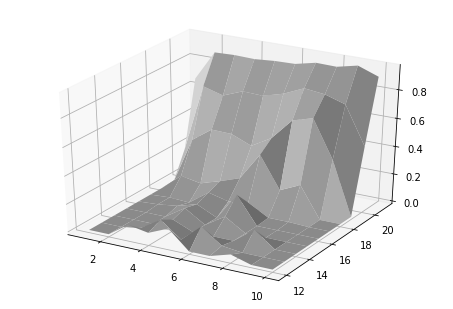

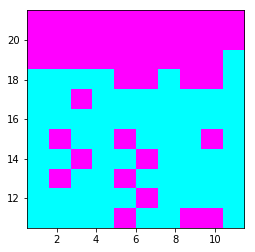

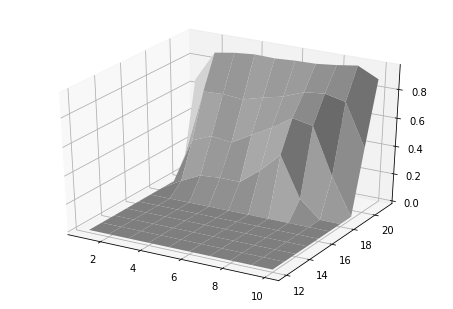

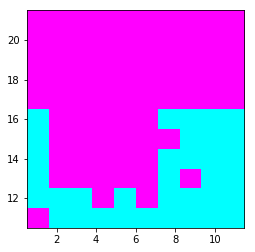

In [5]:
draw_value(player.Q, useable_ace=True, is_q_dict=True, A=player.A)
draw_policy(epsilon_greedy_policy, player.A, player.Q, epsilon=1e-10, useable_ace=True)
draw_value(player.Q, useable_ace = False, is_q_dict=True, A=player.A)
draw_policy(epsilon_greedy_policy, player.A, player.Q, epsilon=1e-10, useable_ace=False)